In [1]:
import pandas as pd

# Load the datasets
streaming_activity_path = "C:/Users/mlawal/Downloads/Dissertation Papers/Music/My Streaming Activity.csv"
scrobble_features_path = "C:/Users/mlawal/Downloads/Dissertation Papers/Music/Scrobble_Features.csv"

streaming_activity_df = pd.read_csv(streaming_activity_path)
scrobble_features_df = pd.read_csv(scrobble_features_path)


In [2]:
# Cleaning "Scrobble_Features.csv"
scrobble_features_df.drop('spotify_track_preview_url', axis=1, inplace=True)
for column in scrobble_features_df.columns:
    if scrobble_features_df[column].dtype == 'object':
        scrobble_features_df[column].fillna('Unknown', inplace=True)
    else:
        scrobble_features_df[column].fillna(scrobble_features_df[column].mean(), inplace=True)

# Cleaning "My Streaming Activity.csv"
streaming_activity_df['Album'].fillna('Unknown Album', inplace=True)


In [3]:
# Merging the datasets on 'SongID'
merged_df = pd.merge(streaming_activity_df, scrobble_features_df, on='SongID', how='inner')


In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you've already merged the datasets and named it merged_df

# Creating the 'DayOfWeek' column from 'TimeStamp_Central' or 'TimeStamp_UTC' column
merged_df['TimeStamp_Central'] = pd.to_datetime(merged_df['TimeStamp_Central'])
merged_df['DayOfWeek'] = merged_df['TimeStamp_Central'].dt.day_name()

# Top 10 most streamed artists
top_artists = merged_df['Performer_x'].value_counts().head(10)

# Streaming activity over time by day of the week
streaming_by_day = merged_df['DayOfWeek'].value_counts()

# Selecting only numeric columns for correlation analysis
numeric_columns = merged_df.select_dtypes(include=[float, int])

# Group by 'SongID' and calculate mean of numeric columns
grouped_by_song = numeric_columns.groupby(merged_df['SongID']).mean()

# Correlation between danceability and Spotify track popularity
corr_danceability_stream = grouped_by_song[['danceability', 'spotify_track_popularity']].corr()




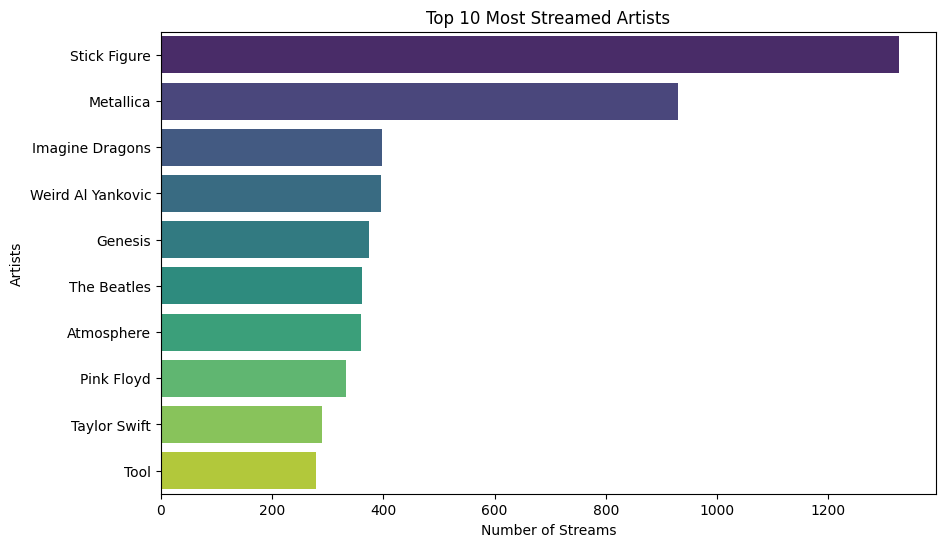

In [8]:
# Visualization - Top 10 most streamed artists
plt.figure(figsize=(10, 6))
sns.barplot(x=top_artists.values, y=top_artists.index, palette='viridis')
plt.title('Top 10 Most Streamed Artists')
plt.xlabel('Number of Streams')
plt.ylabel('Artists')
plt.show()



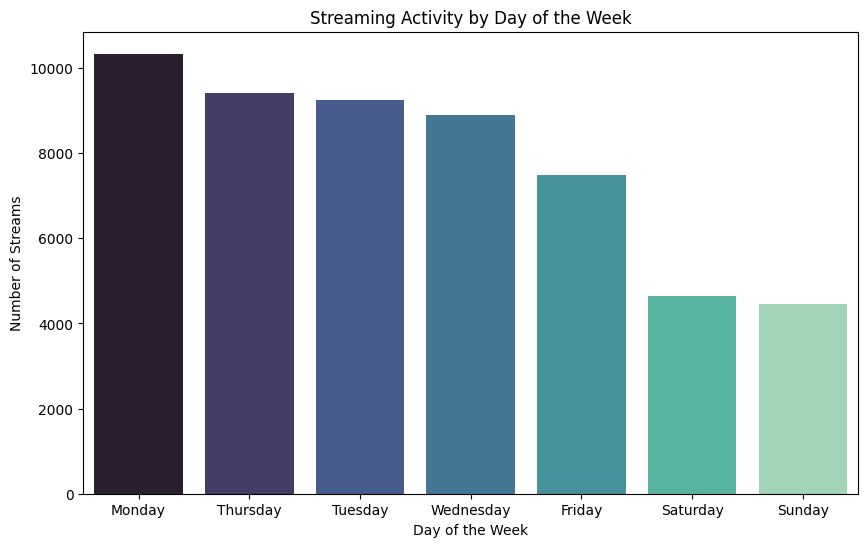

In [9]:
# Visualization - Streaming activity by day of the week
plt.figure(figsize=(10, 6))
sns.barplot(x=streaming_by_day.index, y=streaming_by_day.values, palette='mako')
plt.title('Streaming Activity by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Streams')
plt.show()



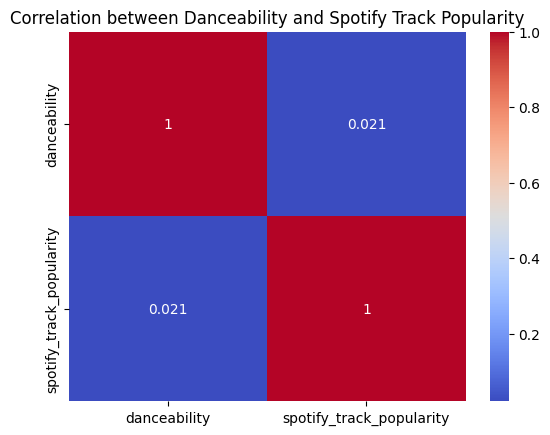

In [10]:
# Visualization - Correlation heatmap
sns.heatmap(corr_danceability_stream, annot=True, cmap='coolwarm')
plt.title('Correlation between Danceability and Spotify Track Popularity')
plt.show()

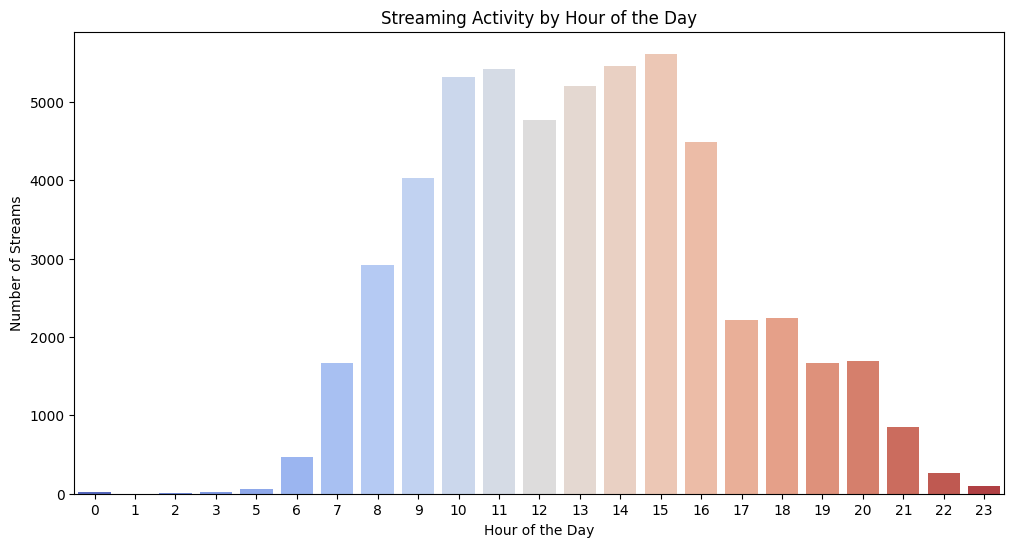

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'TimeStamp_Central' is in datetime format
merged_df['Hour'] = merged_df['TimeStamp_Central'].dt.hour
streaming_by_hour = merged_df['Hour'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
sns.barplot(x=streaming_by_hour.index, y=streaming_by_hour.values, palette='coolwarm')
plt.title('Streaming Activity by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Streams')
plt.show()


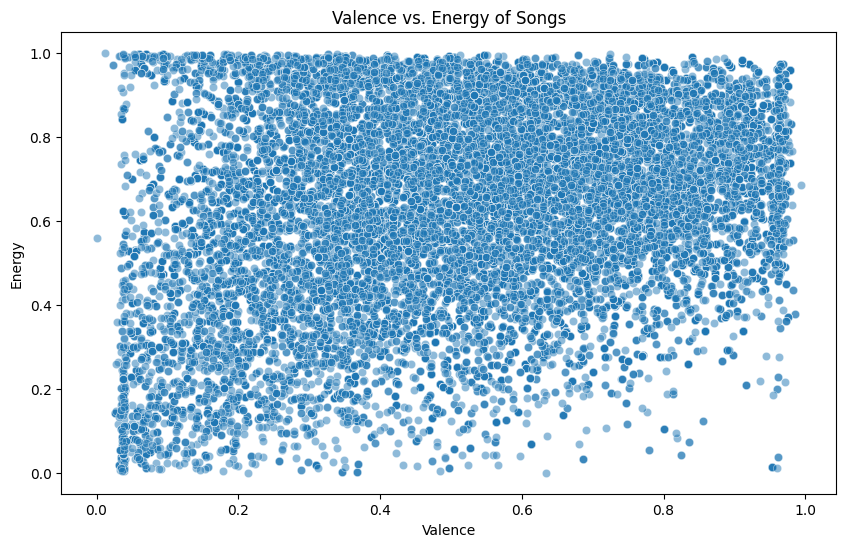

In [13]:
# Scatter plot of valence vs. energy
plt.figure(figsize=(10, 6))
sns.scatterplot(x='valence', y='energy', data=merged_df, alpha=0.5)
plt.title('Valence vs. Energy of Songs')
plt.xlabel('Valence')
plt.ylabel('Energy')
plt.show()


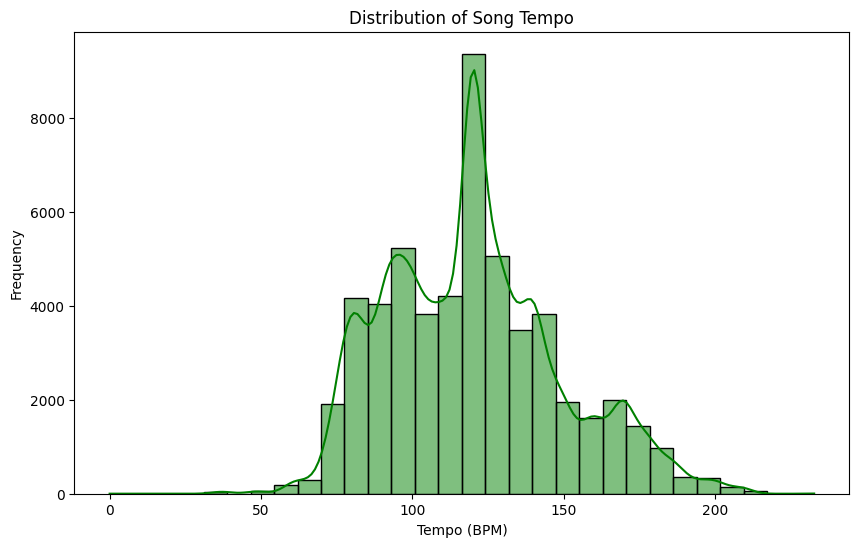

In [14]:
plt.figure(figsize=(10, 6))
sns.histplot(merged_df['tempo'], bins=30, kde=True, color='green')
plt.title('Distribution of Song Tempo')
plt.xlabel('Tempo (BPM)')
plt.ylabel('Frequency')
plt.show()


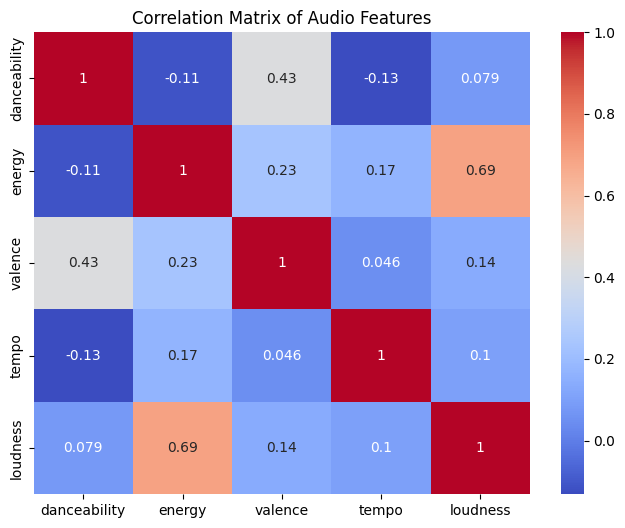

In [15]:
# Select only relevant numeric columns for correlation
features_to_correlate = ['danceability', 'energy', 'valence', 'tempo', 'loudness']
correlation_matrix = merged_df[features_to_correlate].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Audio Features')
plt.show()


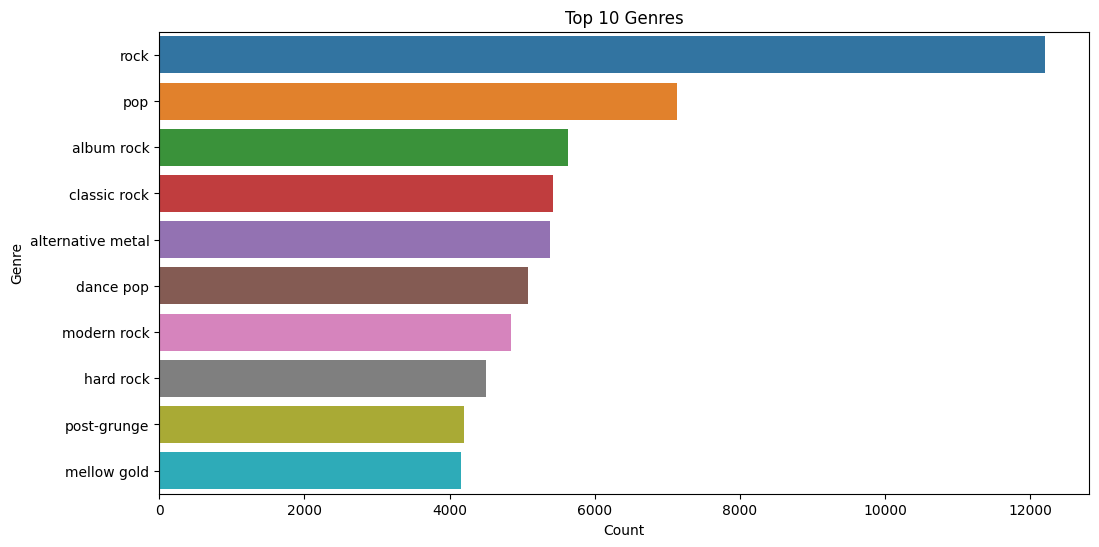

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Function to safely evaluate whether a string is a list and convert it if necessary
def safe_eval_list_string(s):
    try:
        # Try to evaluate the string as a list
        evaluated = ast.literal_eval(s)
        if isinstance(evaluated, list):
            return evaluated
    except:
        # If it fails, return a list containing the original string
        return [s]

# Apply the function to the spotify_genre column
merged_df['spotify_genre'] = merged_df['spotify_genre'].apply(safe_eval_list_string)

# Exploding the list into separate rows
genres_expanded = merged_df.explode('spotify_genre')

# Counting the occurrences of each genre
genre_counts = genres_expanded['spotify_genre'].value_counts().head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=genre_counts.values, y=genre_counts.index, palette='tab10')
plt.title('Top 10 Genres')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()
